# 1. Install Dependencies and Setup

In [4]:
!pip install tensorflow

In [5]:
pip show tensorflow

Name: tensorflow
Version: 2.13.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: E:\PythonApps\ImageClassification\imageclassification\Lib\site-packages
Requires: tensorflow-intel
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [14]:
!pip list

Package                      Version
---------------------------- -----------
absl-py                      1.4.0
asttokens                    2.2.1
astunparse                   1.6.3
backcall                     0.2.0
cachetools                   5.3.1
certifi                      2023.7.22
charset-normalizer           3.2.0
colorama                     0.4.6
comm                         0.1.4
debugpy                      1.6.7.post1
decorator                    5.1.1
executing                    1.2.0
flatbuffers                  23.5.26
gast                         0.4.0
google-auth                  2.22.0
google-auth-oauthlib         1.0.0
google-pasta                 0.2.0
grpcio                       1.57.0
h5py                         3.9.0
idna                         3.4
ipykernel                    6.25.1
ipython                      8.14.0
jedi                         0.19.0
jupyter_client               8.3.0
jupyter_core                 5.3.1
keras                        2.1

In [7]:
import tensorflow as tf
import os

In [8]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [9]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [13]:
pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/fb/c4/f574ba6f04e6d7bf8c38d23e7a52389566dd7631fee0bcdd79ea07ef2dbf/opencv_python-4.8.0.76-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
    --------------------------------------- 0.7/38.1 MB 22.5 MB/s eta 0:00:02
   - -------------------------------------- 1.8/38.1 MB 23.0 MB/s eta 0:00:02
   --- ------------------------------------ 2.9/38.1 MB 23.0 MB/s eta 0:00:02
   ---- ----------------------------------- 3.9/38.1 MB 22.8 MB/s eta 0:00:02
   ----- ---------------------------------- 4.9/38.1 MB 22.5 MB/s eta 0:00:02
   ------ --------------------------------- 6.0/38.1 MB 22.6 MB/s eta 0:00:02
   ------- -------------------------------- 7.1/38.1 MB 22.6 MB/s eta 0:00:02
   -------- ------------------------------- 8.2/38.1 MB 22.7 MB/s eta 0:00:02
   --------- ------------------------------ 9.3/38.1 MB 22.8 MB/s eta 0:00:02
   ----

In [15]:
import cv2
import imghdr

C:\Users\User\AppData\Local\Temp\ipykernel_8100\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [16]:
data_dir = 'data' 

In [17]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [18]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [20]:
pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/4d/9c/65830d4a56c47f5283eaa244dc1228c5da9c844a9f999ebcc2e69bf6cc65/matplotlib-3.7.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/16/09/989b982322439faa4bafffcd669e6f942b38fee897c2664c987bcd091dec/contourpy-1.1.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/52/65/aaa3d2b7a292d93cc2cf1c534d03ba3f744e480f15b3b2ab6ad68189f7ee/fonttools-4.42.0-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/153.7 kB ? eta -:--:--
     -------------------------------------- 153.7/153.7 kB 9.6 MB/s eta 0:00:00
     ---------------------------------------- 0.0/55.4 kB ? eta -:--:--
     ---------------------------------------- 55.4/55.4 kB 3.0 MB/s eta 0:00:00
  Obtaining dependency information for pi

In [21]:
import numpy as np
from matplotlib import pyplot as plt

In [22]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [23]:
data_iterator = data.as_numpy_iterator()

In [24]:
batch = data_iterator.next()

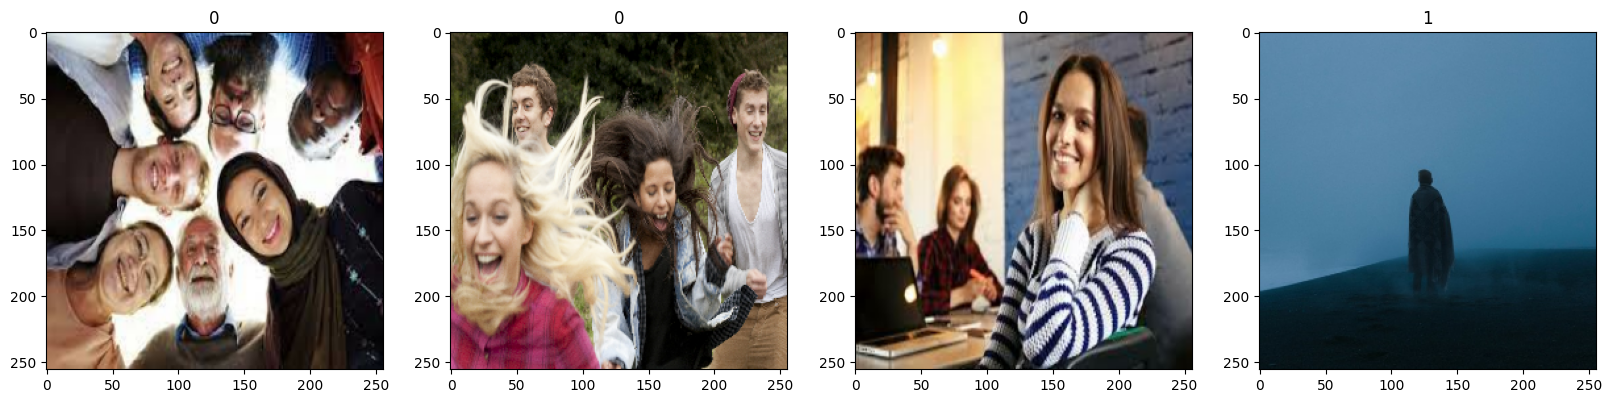

In [25]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [26]:
data = data.map(lambda x,y: (x/255, y))

In [27]:
data.as_numpy_iterator().next()

(array([[[[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [0.9773284 , 0.9773284 , 0.9773284 ],
          [0.972549  , 0.972549  , 0.972549  ],
          [0.972549  , 0.972549  , 0.972549  ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [0.97865385, 0.97865385, 0.97865385],
          [0.97514683, 0.97514683, 0.97514683],
          [0.972549  , 0.972549  , 0.972549  ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [0.98190105, 0.98190105, 0.98190105],
          [0.9793049 , 0.9793049 , 0.9793049 ],
          [0.97863054, 0.97863054, 0.97863054]],
 
         ...,
 
         [[0.08147212, 0.08539369, 0.15598193],
          [0.04844

# 5. Split Data

In [28]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [29]:
train_size

7

In [30]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [31]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [33]:
model = Sequential()

In [34]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [35]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

# 7. Train

In [37]:
logdir='logs'

In [38]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [39]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 7s 739ms/step - loss: 1.1060 - accuracy: 0.5089 - val_loss: 0.6909 - val_accuracy: 0.4844
Epoch 2/20
7/7 [==============================] - 5s 616ms/step - loss: 0.6774 - accuracy: 0.6384 - val_loss: 0.6570 - val_accuracy: 0.6562
Epoch 3/20
7/7 [==============================] - 5s 556ms/step - loss: 0.6562 - accuracy: 0.5312 - val_loss: 0.6393 - val_accuracy: 0.8750
Epoch 4/20
7/7 [==============================] - 5s 543ms/step - loss: 0.6350 - accuracy: 0.7098 - val_loss: 0.6278 - val_accuracy: 0.5938
Epoch 5/20
7/7 [==============================] - 4s 525ms/step - loss: 0.6018 - accuracy: 0.7143 - val_loss: 0.5333 - val_accuracy: 0.7500
Epoch 6/20
7/7 [==============================] - 5s 656ms/step - loss: 0.5565 - accuracy: 0.7366 - val_loss: 0.4874 - val_accuracy: 0.8125
Epoch 7/20
7/7 [==============================] - 5s 667ms/step - loss: 0.4482 - accuracy: 0.8304 - val_loss: 0.4612 - val_accuracy: 0.7969
Epoch 8/20
7/7 [====

# 8. Plot Performance

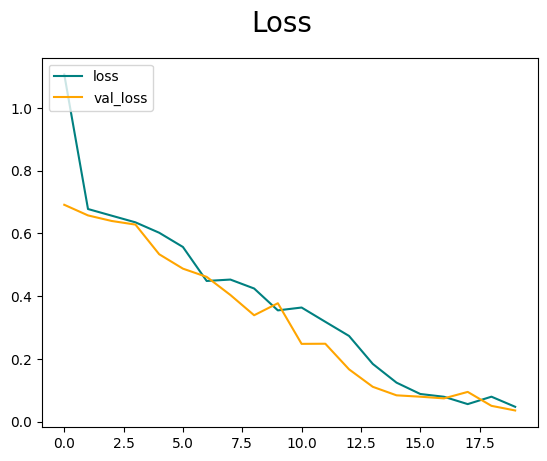

In [41]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

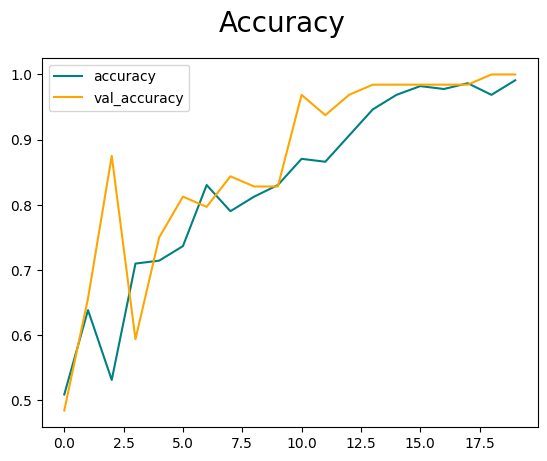

In [42]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [43]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [44]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [45]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 126ms/step


In [46]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

In [47]:
import cv2

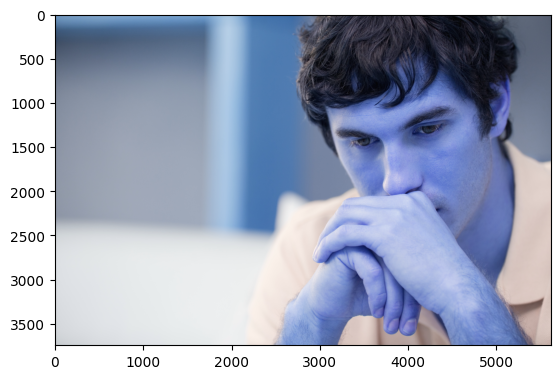

In [83]:
img = cv2.imread('8iAb9k4aT.jpg')
plt.imshow(img)
plt.show()

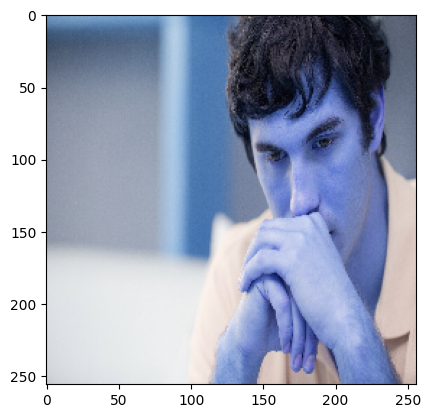

In [84]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [85]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 19ms/step


In [86]:
yhat

array([[0.92146844]], dtype=float32)

In [87]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


# 11. Save the Model

In [88]:
from tensorflow.keras.models import load_model

In [89]:
model.save(os.path.join('models','imageclassifiernewversion.h5'))

E:\PythonApps\ImageClassification\imageclassification\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [92]:
new_model = load_model(os.path.join('models','imageclassifiernewversion.h5'))

In [95]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 19ms/step


array([[0.92146844]], dtype=float32)